## CORRELACIÓN Y COVARIANZA

In [1]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene

plt.rcParams["figure.figsize"] = (20,20) 
pd.options.display.max_columns = None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [2]:
df = pd.read_csv('../archivos/coste_vida_valido.csv', index_col=0)

In [3]:
df

,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,Seoul,South Korea,6.15,3.93,2.20,3.530000,4.04,10.580000,41.610000,3.710000,1.05,15.360000,2.120000,3.460000,1.000000,0.920000,1.430000,182.13,22.48,55.880000,9.60,404.150000,17902.550000,1731.080000,2689.620000
1,Shanghai,China,5.69,3.98,2.74,1.220000,2.22,4.860000,13.120000,1.600000,0.64,14.240000,0.940000,3.560000,0.570000,0.430000,1.200000,66.00,17.07,63.490000,8.54,1382.620000,26379.450000,1561.590000,1419.870000
2,Guangzhou,China,4.98,3.54,1.91,1.030000,1.71,3.770000,11.750000,1.440000,0.51,11.390000,0.950000,3.700000,0.360000,0.370000,1.190000,59.65,16.66,34.170000,8.54,555.180000,24556.210000,688.050000,1211.680000
3,Mumbai,India,3.68,2.48,0.75,0.830000,0.95,3.690000,5.950000,0.670000,0.35,9.830000,2.270000,4.300000,0.250000,0.310000,1.350000,43.57,9.33,25.370000,4.30,107.070000,3682.670000,699.800000,640.810000
4,Delhi,India,4.30,1.77,0.73,0.850000,1.02,3.810000,5.710000,0.750000,0.36,9.830000,1.540000,4.300000,0.490000,0.220000,1.240000,58.07,7.95,21.200000,4.91,74.000000,1964.240000,329.150000,586.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,Whitehorse,Canada,10.19,3.57,1.30,1.680000,3.35,7.650000,28.320000,2.450000,4.76,11.550000,4.110000,30.580000,4.441553,1.540000,1.360000,129.12,52.33,32.508739,13.59,1359.160000,3295.960000,2348.401068,5946.320000
4077,Wolfsberg,Austria,8.15,3.40,1.04,1.560000,3.17,7.250000,11.330000,4.300000,1.63,8.150000,3.510000,25.820000,2.290000,0.830000,1.430000,106.86,42.47,46.210000,11.55,1198.279907,27183.180000,906.110000,3481.060000
4078,Yucca Valley,United States,8.50,3.90,1.06,1.980000,4.45,13.470000,19.840000,2.690000,2.13,15.240000,4.250000,9.920000,3.190000,1.060000,1.630000,129.93,56.70,56.700000,5.32,177.180000,2126.150000,1417.430000,2480.510000
4079,Branson,United States,12.89,1.80,1.80,1.379397,1.24,6.175241,12.958568,1.591765,0.77,8.812994,1.534370,5.373776,1.052280,1.030000,1.010000,77.35,27.46,25.780000,7.74,266.900373,3349.336130,412.550000,784.703925


1- Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

Siempre contando con variables numéricas:

- Covarianza: muestra la dirección de la relación pero no su fuerza (fijarse si es positiva o negativa)

- Correlación: muestra la dirección de la relación y también su fuerza (cuanto más cerca de 1 ó -1 mayor la fuerza de la relación)

2- Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [9]:
numericas = df.select_dtypes(include = np.number)

In [10]:
round(numericas.cov(),3)

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
mcdonalds,7.054,2.172,0.321,1.883,1.906,7.632,-5.992,0.824,0.876,4.268,1.029,6.485,1.889,1.321,0.596,111.943,1.025701e+03,22.990,7.587,720.441,7.842369e+03,1255.524,2657.691
cappuccino,2.172,1.809,0.173,1.375,0.891,3.815,2.182,0.386,0.634,3.541,0.713,3.260,0.941,0.537,0.112,52.650,1.773620e+02,10.748,4.014,442.740,5.787363e+03,823.836,1684.730
milk,0.321,0.173,0.254,0.141,0.188,0.414,-2.136,0.152,0.070,0.809,0.079,0.440,0.066,0.088,0.014,4.113,1.882540e+02,3.684,0.443,21.643,6.659050e+02,62.662,69.616
rice,1.883,1.375,0.141,2.644,0.908,4.415,6.724,0.507,0.742,3.237,0.772,2.668,0.834,0.537,0.036,51.339,-9.066900e+01,10.404,3.760,419.716,5.907025e+03,898.596,1669.368
eggs,1.906,0.891,0.188,0.908,1.121,3.305,-0.388,0.422,0.395,2.014,0.462,2.634,0.694,0.466,0.194,44.580,2.990620e+02,9.500,2.965,298.418,3.742036e+03,552.426,1121.483
chicken,7.632,3.815,0.414,4.415,3.305,19.694,16.485,1.439,1.783,8.484,2.058,9.418,2.970,1.945,0.634,175.866,3.163720e+02,34.100,12.189,1374.501,1.726210e+04,2405.204,4845.187
beef,-5.992,2.182,-2.136,6.724,-0.388,16.485,16826.135,3.342,0.461,2.267,0.753,16.729,6.572,3.070,1.464,505.392,-9.852129e+05,4.297,26.155,2597.984,3.311720e+04,1737.331,8707.424
banana,0.824,0.386,0.152,0.507,0.422,1.439,3.342,0.667,0.171,0.878,0.221,1.170,0.295,0.206,0.068,22.769,-2.100000e+01,5.274,1.416,92.235,1.608648e+03,203.806,438.436
water,0.876,0.634,0.070,0.742,0.395,1.783,0.461,0.171,0.452,1.673,0.388,1.523,0.391,0.214,0.018,19.657,8.564900e+01,4.299,1.572,196.857,2.447850e+03,382.351,724.347
wine,4.268,3.541,0.809,3.237,2.014,8.484,2.267,0.878,1.673,20.498,2.347,7.024,1.641,1.007,-0.111,69.813,5.519130e+02,27.975,7.737,925.761,1.311645e+04,1763.209,3590.633


In [11]:
round(numericas.corr(),3)

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
mcdonalds,1.000,0.608,0.240,0.436,0.678,0.648,-0.017,0.380,0.491,0.355,0.428,0.564,0.573,0.607,0.461,0.493,0.051,0.414,0.696,0.534,0.401,0.528,0.619
cappuccino,0.608,1.000,0.255,0.629,0.626,0.639,0.013,0.351,0.701,0.581,0.586,0.560,0.564,0.487,0.171,0.458,0.017,0.383,0.727,0.649,0.584,0.684,0.775
milk,0.240,0.255,1.000,0.172,0.352,0.185,-0.033,0.368,0.206,0.354,0.174,0.201,0.106,0.212,0.058,0.095,0.049,0.350,0.214,0.085,0.179,0.139,0.085
rice,0.436,0.629,0.172,1.000,0.528,0.612,0.032,0.382,0.678,0.440,0.525,0.379,0.413,0.404,0.045,0.370,-0.007,0.306,0.564,0.509,0.493,0.617,0.635
eggs,0.678,0.626,0.352,0.528,1.000,0.703,-0.003,0.489,0.556,0.420,0.482,0.575,0.528,0.537,0.376,0.493,0.037,0.430,0.683,0.555,0.480,0.583,0.656
chicken,0.648,0.639,0.185,0.612,0.703,1.000,0.029,0.397,0.598,0.422,0.512,0.490,0.539,0.535,0.294,0.464,0.009,0.368,0.669,0.610,0.528,0.605,0.676
beef,-0.017,0.013,-0.033,0.032,-0.003,0.029,1.000,0.032,0.005,0.004,0.006,0.030,0.041,0.029,0.023,0.046,-0.998,0.002,0.049,0.039,0.035,0.015,0.042
banana,0.380,0.351,0.368,0.382,0.489,0.397,0.032,1.000,0.312,0.238,0.299,0.331,0.291,0.308,0.171,0.326,-0.003,0.309,0.423,0.223,0.268,0.279,0.332
water,0.491,0.701,0.206,0.678,0.556,0.598,0.005,0.312,1.000,0.550,0.638,0.523,0.468,0.388,0.054,0.342,0.017,0.306,0.570,0.577,0.494,0.635,0.667
wine,0.355,0.581,0.354,0.440,0.420,0.422,0.004,0.238,0.550,1.000,0.573,0.358,0.292,0.272,-0.051,0.180,0.016,0.296,0.417,0.403,0.393,0.435,0.491


Tras calcular la covarianza y la relación, y fijarnos en las relaciones con nuestra variable dependiente "Basic", observamos que para casi todas las variables independientes la relación es positiva, es decir, a mayor precio en la variable independiente mayor precio en nuestra variable dependiente, exceptuando dos variables: 

- internet(-0.022): es una relación muy cercana a 0, podría no ser significativa 

3- Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

In [13]:
mask = np.triu(np.ones_like(numericas.corr(),dtype = np.bool_))

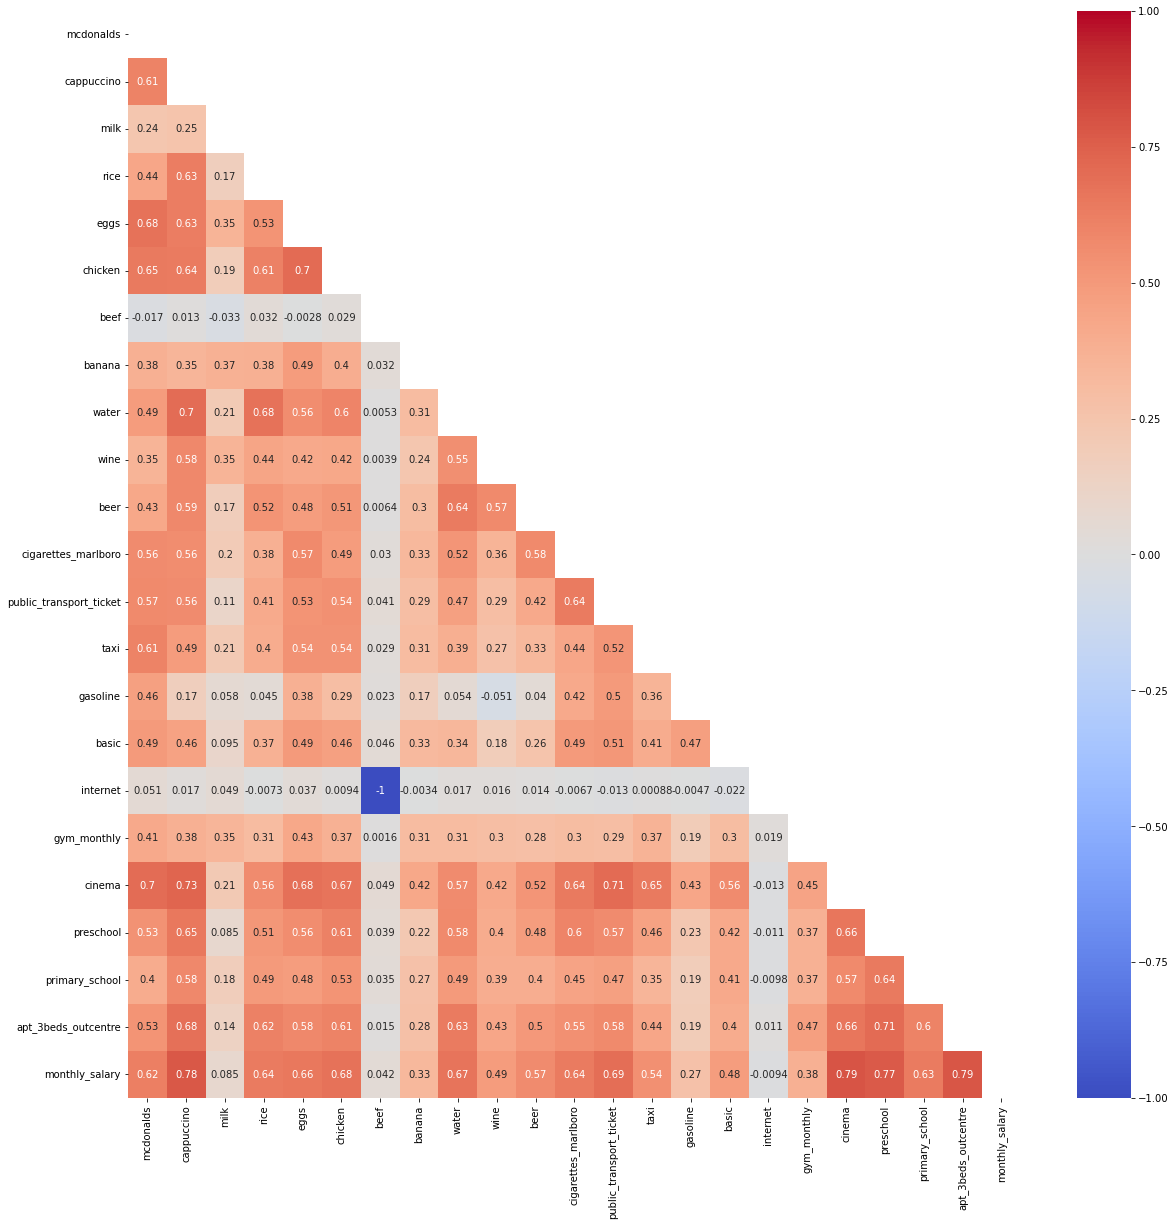

In [14]:
sns.heatmap(numericas.corr(),
            cmap = 'coolwarm',
            annot = True,
            mask = mask,
            vmin = -1,
            vmax= 1)

plt.savefig('heatmap_beef.png');

4- Guardad la gráfica del heatmap.

- Guardado :)